# Support Vector Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [35]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [36]:
X.head(2)

,0,1
0,-1.253386,-0.798558
1,1.513578,-0.541609


In [37]:
y.head(2)

,0
0,1
1,0


<Axes: xlabel='0', ylabel='1'>

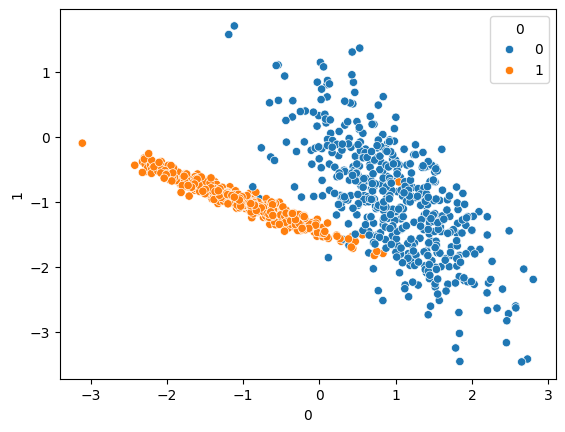

In [38]:
sns.scatterplot(x = X[0],y = X[1],hue=y[0])

In [39]:
# .'. the datapoints are linearly separeble, so we must use Linear Kernel SVC.

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

# Linear Kernel SVC

In [41]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [42]:
svc.coef_

array([[-3.0382233 , -1.94993203]])

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       125
           1       0.96      0.98      0.97       125

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[120   5]
 [  3 122]]


#  Linear Kernel SVC when datapoints are non-linearly separeble

<Axes: xlabel='0', ylabel='1'>

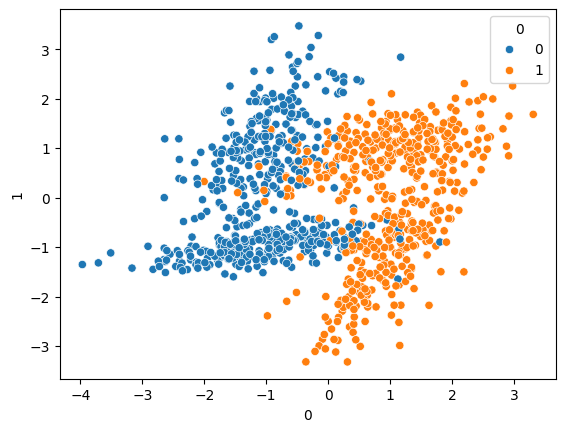

In [44]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
sns.scatterplot(x = X[0],y = X[1],hue=y[0])

In [45]:
# .'. the datapoints are non-linearly separeble, so we must not use Linear Kernel SVC. Accuracy will decrease

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [47]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       117
           1       0.96      0.86      0.90       133

    accuracy                           0.90       250
   macro avg       0.91      0.91      0.90       250
weighted avg       0.91      0.90      0.90       250

[[112   5]
 [ 19 114]]


In [ ]:
# .'. Thus, Accuracy decreased from 0.97 to 0.90 with Linear kernel svc. So, we must use RBF kernel, Polynomial Kernel, Sigmoid Kernel 
# for such non-linearly separable datapoints. Then check the accuracy, it will get better than that of linear kernel svc.

# RBF Kernel SVC

In [49]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       117
           1       0.97      0.89      0.93       133

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[113   4]
 [ 14 119]]


In [ ]:
# .'. Thus, Accuracy increased from 0.90 to 0.93 with RBF kernel svc. 

# Polynomial Kernel SVC

In [51]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)

## Prediction
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       117
           1       0.97      0.85      0.91       133

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

[[114   3]
 [ 20 113]]


In [ ]:
# .'. Thus, Accuracy increased from 0.90 to 0.91 with polynomial kernel svc. 

# Sigmoid Kernel SVC

In [52]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       117
           1       0.80      0.67      0.73       133

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250

[[95 22]
 [44 89]]


In [ ]:
# .'. Thus, Accuracy again decreased from 0.90 to 0.74 with Sigmoid kernel svc. So, it will not work.

In [53]:
sigmoid.intercept_

array([-0.60480475])

### So, RBF performs better than any other kernels for non-linearly seperable datapoints.

## Hyperparameter Tuning With SVC

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model=SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid=GridSearchCV(model, param_grid=param_grid, cv=5, refit=True, verbose=3)

In [55]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [56]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [57]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       117
           1       0.98      0.91      0.94       133

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[114   3]
 [ 12 121]]


In [ ]:
# .'. Thus, Accuracy increased from 0.93 to 0.94 with Hyperparameter tunning.